# Author: Ruslan Brilenkov 
## Contact: [LinkedIn](https://www.linkedin.com/in/ruslan-brilenkov/)

# A step-by-step guide to Keras
## [link to original article](https://medium.datadriveninvestor.com/practical-guide-to-keras-deep-neural-networks-nn-f21a7715124f)

# Step 1: Importing the necessary libraries 

In [1]:
# of course, numerical Python:
import numpy as np
# utilities for the categorical data:
from tensorflow.keras.utils import to_categorical
# dataset:
from keras.datasets import cifar10

# building blocks of Keras:
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

# Step 2: Loading our data set

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
NUMB_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUMB_CLASSES)
print(y_test[0])
y_test = to_categorical(y_test, NUMB_CLASSES)
print(y_test[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Step 3: Deciding on NN architecture

## Example of the Sequential architecture

In [3]:
# from keras.models import Sequential
# from keras.layers import Flatten, Dense
# model = Sequential([
#     Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
#     Flatten(),
#     Dense(150, activation = 'relu'),
#     Dense(10, activation = 'softmax'),
# ])

## Example of the Functional API architecture

In [4]:
# Importing explicitly the layers and the model we will be using:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

# Input layer is an image of size 32 x 32 and 3 channels (e.g., RGB, BGR, etc.):
input_layer = Input(shape=(32,32, 3))
# Here are different types of layers:
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

## What is the difference between Sequential and Functional API architectures? 

### - Sequential neural network (NN) is a linear combination of layers, where one layer follows another without any bracnhes.

### - Functional API neural network (NN) allows branches, hence more control over the network architecture. Probably, a bit more challenging than the first one but it gives us freedom of design.

## We can summarize our model as follows

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Step 4: Compiling our model

## This step requires 3 things. One is optimizer type. Two is loss function. Three is performance evaluaiton metrics

In [6]:
from keras.optimizers import Adam
# define optimizer
opt = Adam(learning_rate=0.0005)
# compile the model with the optimizer, loss function and metrics for evaluation
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

# Step 5: Training our model

## This step is pretty straightforward. Provide the training data X, and labels Y. Batch size, epochs for how long to train and whether to shuffle the data or not.

In [7]:
# training our model 
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True
         )

Epoch 1/10
1563/1563 [==============================] - 25s 6ms/step - loss: 1.9686 - accuracy: 0.2826
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6791 - accuracy: 0.4030
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5949 - accuracy: 0.4319
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5476 - accuracy: 0.4455
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4888 - accuracy: 0.4711
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4596 - accuracy: 0.4763
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4316 - accuracy: 0.4886
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4186 - accuracy: 0.4930
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3955 - accuracy: 0.5013
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3

## As we see, our training process reduces loss and increases accuracy!

## But what about the model performance on the out-of-sample data, i.e., the data which our NN has never seen before?

# Step 6: Evaluating our model

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 1.4356 - accuracy: 0.4964


[1.4355742931365967, 0.49639999866485596]

# Step 7: (Bonus) visualization of our model

In [9]:
MY_CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

pred = model.predict(x_test)
pred_single = MY_CLASSES[np.argmax(pred, axis = -1)]
actual_label = MY_CLASSES[np.argmax(y_test, axis = -1)]

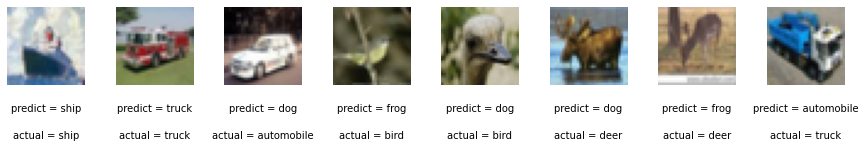

In [10]:
import matplotlib.pyplot as plt

n_to_show = 8
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.text(0.5, -0.35, f"predict = {pred_single[idx]}", fontsize=10
              , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f"actual = {actual_label[idx]}", fontsize=10
                , ha='center', transform=ax.transAxes)
    ax.axis('off')
    ax.imshow(img)
